**Import required libraries and modules**
________________________________________________________________________________

In [32]:
import numpy as np
import pandas as pd
import os
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt

**Specifying the TensorFlow version**
________________________________________________________________________________

In [33]:
tf.__version__

'2.8.0'

**Testing for GPU**
________________________________________________________________________________

In [34]:
tf.test.gpu_device_name()

''

**Data Label**
________________________________________________________________________________

In [35]:
mnist = tf.keras.datasets.mnist

**Split traing and test data**
________________________________________________________________________________

In [36]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

**Normalizing the pixels, not digest**
________________________________________________________________________________

In [37]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

**Create the model**
________________________________________________________________________________

In [38]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [39]:
model.compile(optimizer='adam', loss ='sparse_categorical_crossentropy', metrics=['accuracy'])

In [40]:
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2658 - accuracy: 0.9204
Epoch 2/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1087 - accuracy: 0.9673
Epoch 3/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0729 - accuracy: 0.9768


In [41]:
model.save('handwritten.model')

INFO:tensorflow:Assets written to: handwritten.model/assets


**Initial EDA**
________________________________________________________________________________

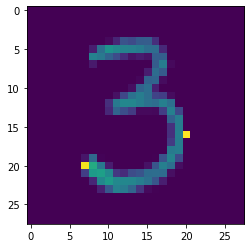

In [42]:
plt.imshow(x_train[50])
plt.show()

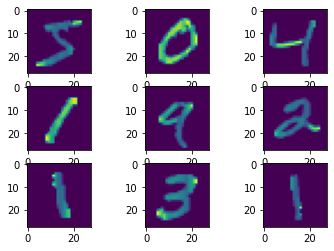

In [43]:
fig = plt.figure()
for i in range(9):
  plt.subplot(330 + 1 + i)
  plt.imshow(x_train[i])

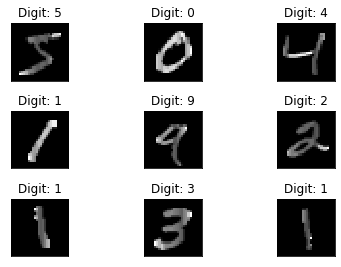

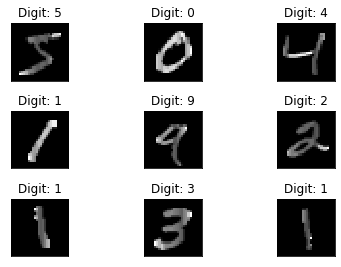

In [44]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [45]:
model = tf.keras.models.load_model('handwritten.model')

**Check loss and accuracy on test data**
________________________________________________________________________________

In [46]:
loss, accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0870 - accuracy: 0.9730


In [47]:
result = model.predict([x_train])

In [48]:
print(loss)
print(accuracy)
print(result)

0.08699901401996613
0.9729999899864197
[[6.1650449e-11 2.8479698e-07 1.9789031e-08 ... 1.1367379e-07
  2.6082674e-09 1.3192348e-06]
 [9.9938858e-01 5.8132753e-07 5.9212372e-04 ... 6.6175689e-06
  8.3649041e-08 9.8244336e-06]
 [2.7055730e-10 3.4670396e-05 1.2662453e-05 ... 9.4354564e-06
  1.5295473e-06 4.5410854e-07]
 ...
 [1.6810406e-13 5.2643094e-09 6.1724757e-11 ... 1.5988873e-11
  5.0475204e-08 9.0786173e-08]
 [3.7178729e-06 5.2026538e-05 4.6727153e-05 ... 4.4581404e-07
  5.1621887e-06 1.7417694e-08]
 [5.5235187e-06 1.7802644e-07 1.1532022e-05 ... 1.1605472e-06
  9.9994123e-01 3.6753602e-06]]


5


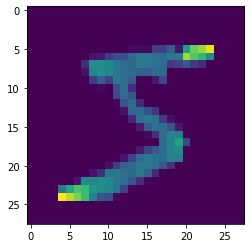

In [49]:
plt.imshow(x_train[0])
prediction=model.predict(x_train)
print(np.argmax(prediction[0]))

0


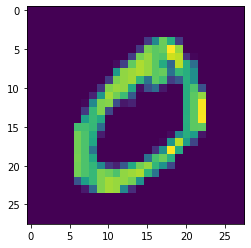

In [50]:
plt.imshow(x_train[1])
prediction=model.predict(x_train)
print(np.argmax(prediction[1]))

4


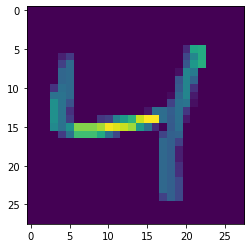

In [51]:
plt.imshow(x_train[2])
prediction=model.predict(x_train)
print(np.argmax(prediction[2]))

1


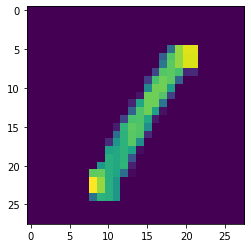

In [52]:
plt.imshow(x_train[3])
prediction=model.predict(x_train)
print(np.argmax(prediction[3]))